In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
# local project modules
import src.SafReader as sr

In [4]:
safDf  = sr.read("..\\test\\data\\example_histos.saf")

Found histogram
	Desc
		Name: ptj1
		bins: 50
		min: 0.000000E+00
		max: 1.200000E+03
		Region: dummy
	Ended Desc
	Statistics
		nEvents: 10
		normEwEvents: 8.166534E-04
		nEntries: 10
		normEwEntries: 8.166534E-04
		sumWeightsSq: 6.783440E-08
		sumValWeight: 1.500932E-01
		sumValSqWeight: 3.150669E+01
	Ended Statistics
	Data
	Ended Data
Ended histogram
Found histogram
	Desc
		Name: etaj1
		bins: 50
		min: -5.000000E+00
		max: 5.000000E+00
		Region: dummy
	Ended Desc
	Statistics
		nEvents: 10
		normEwEvents: 8.166534E-04
		nEntries: 10
		normEwEntries: 8.166534E-04
		sumWeightsSq: 6.783440E-08
		sumValWeight: -9.887226E-05
		sumValSqWeight: 5.519028E-04
	Ended Statistics
	Data
	Ended Data
Ended histogram
Found histogram
	Desc
		Name: ptg1
		bins: 50
		min: 0.000000E+00
		max: 1.200000E+03
		Region: dummy
	Ended Desc
	Statistics
		nEvents: 3
		normEwEvents: 2.476429E-04
		nEntries: 3
		normEwEntries: 2.476429E-04
		sumWeightsSq: 2.124954E-08
		sumValWeight: 4.834803E-02
		sumValSqWeight:

In [5]:
safDf.columns
floatCols=['binMin', 'binMax', 'value']

In [6]:
 safDf[floatCols] = safDf[floatCols].apply(pd.to_numeric, errors='coerce')
safDf["bin"]=(safDf.binMin+safDf.binMax)/2

In [7]:
safDf.value

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000081
5      0.000177
6      0.000000
7      0.000106
8      0.000084
9      0.000077
10     0.000075
11     0.000072
12     0.000144
13     0.000000
14     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
         ...   
178    0.000000
179    0.000072
180    0.000000
181    0.000000
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
187    0.000000
188    0.000000
189    0.000070
190    0.000000
191    0.000000
192    0.000000
193    0.000000
194    0.000000
195    0.000000
196    0.000000
197    0.000000
198    0.000000
199    0.000000
200    0.000000
201    0.000000
202    0.000000
203    0.000000
204    0.000000
205    0.000000
206    0.000000
207    0.000000
Name: value, Length: 208

In [8]:
safDf = safDf[safDf.binMax != np.inf]
safDf = safDf[safDf.binMin != -1*np.inf]

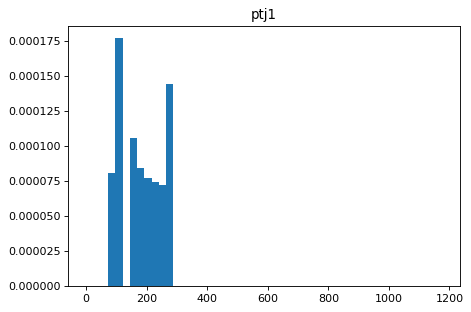

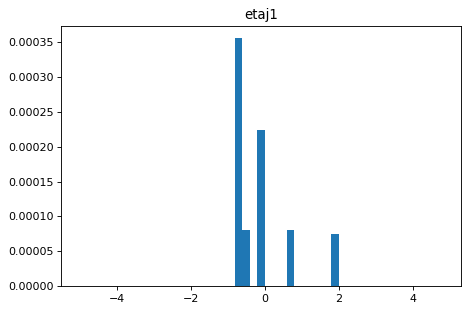

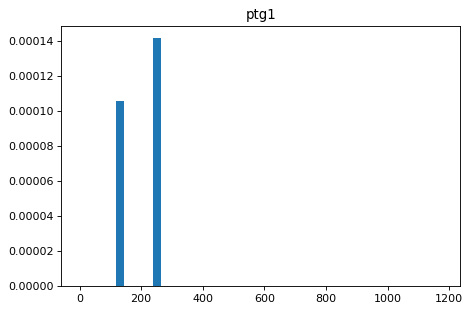

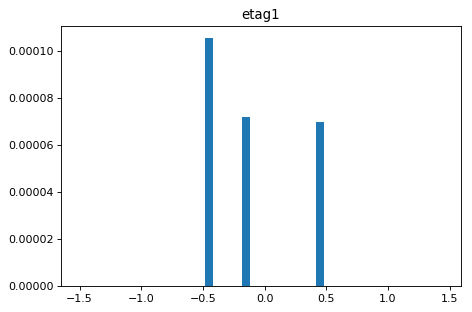

In [62]:
safDf["binlabel"]=(safDf.binMin+safDf.binMax)/2
figno=1
figs = []
for h in safDf.name.unique() :
    f = plt.figure(figno, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    safDf[safDf.name==h]
    plt.hist(safDf[safDf.name==h].binlabel,bins=safDf[safDf.name==h].binMin,weights=safDf[safDf.name==h].value)
    plt.title(h)
    plt.tight_layout()
    plt.savefig('foo'+str(figno)+'.png', bbox_inches='tight')
    figs.append((f,safDf[safDf.name==h]))
    figno=figno+1
    



In [63]:
f.gca().set_title("new title")

Text(0.5,1,'new title')

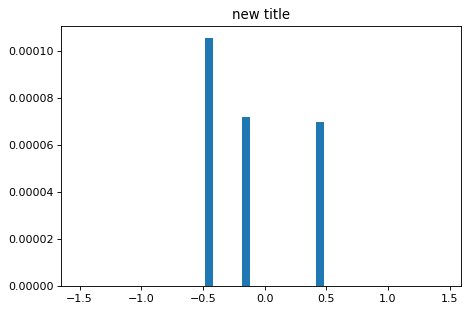

In [64]:
f

In [76]:
i = 0
for fig,df in figs:
    print(fig.gca())
    fig.gca().set_title("Figure No. "+str(i))
    i = i + 1


AxesSubplot(0.150839,0.0930556;0.815713x0.814236)
Figure(480x320)
AxesSubplot(0.136256,0.0930556;0.831453x0.814236)
Figure(480x320)
AxesSubplot(0.136256,0.0930556;0.830296x0.814236)
Figure(480x320)
AxesSubplot(0.136256,0.0930556;0.831453x0.814236)
Figure(480x320)


In [80]:
fig,df = figs[0]

In [90]:
print(df.name.unique())
fig.color("red")

['ptj1']


AttributeError: 'Figure' object has no attribute 'color'